# Fly test using LSTM

### This test evaluates how well an LSTM network can predict system parameters across time that is, whether the parameters that affect the DCCT Booste Current data behaves in a predictable, time-dependent manner.

In [2]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import csv
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

#### extracting and preparing data.
  

In [20]:
CSV_dir = "CSVFiles"

files = [f for f in os.listdir(CSV_dir) if os.path.isfile(os.path.join(CSV_dir, f))]
print(files)

data_arr = []

for i in range(len(files)):
    file_name = f"interval{i+1}.csv"
    file_path = os.path.join(CSV_dir, file_name)
    with open(file_path,  newline='') as f:
        reader = csv.reader(f)
        data = [row for row in reader]
        if i > 0 :
            data = data[1:]
        data_arr = data_arr + data
    
    

df = pd.DataFrame(data_arr)
parame =df.iloc[0]
df.columns = df.iloc[0]
df = df[1:]
for i in range(len(parame)):
    if i >0:
        df[f'{parame[i]}'] = pd.to_numeric(df[f'{parame[i]}'], errors='coerce')

df.iloc[0]

['interval4.csv', 'interval14.csv', 'interval3.csv', 'interval64.csv', 'interval17.csv', 'interval106.csv', 'interval93.csv', 'interval52.csv', 'interval91.csv', 'interval65.csv', 'interval66.csv', 'interval121.csv', 'interval81.csv', 'interval40.csv', 'interval11.csv', 'interval60.csv', 'interval42.csv', 'interval97.csv', 'interval54.csv', 'interval36.csv', 'interval41.csv', 'interval77.csv', 'interval38.csv', 'interval126.csv', 'interval118.csv', 'interval84.csv', 'interval125.csv', 'interval55.csv', 'interval103.csv', 'interval101.csv', 'interval1.csv', 'interval96.csv', 'interval21.csv', 'interval53.csv', 'interval108.csv', 'interval35.csv', 'interval27.csv', 'interval111.csv', 'interval37.csv', 'interval76.csv', 'interval5.csv', 'interval61.csv', 'interval57.csv', 'interval24.csv', 'interval73.csv', 'interval92.csv', 'interval122.csv', 'interval34.csv', 'interval112.csv', 'interval105.csv', 'interval45.csv', 'interval30.csv', 'interval44.csv', 'interval25.csv', 'interval85.csv', '

0
Timestamp                       2024-11-02 07:59:02
BO-PS-QF_getGain                           0.930908
BO-PS-CR4_getCurrent                       0.000017
BO-PS-INK_getVoltage                        330.052
TL1-PS-CR4-Y_CurrentRBV                     -0.0296
BO-PS-QF_getWaveformOffset                    -0.12
BO-PS-QD_getGain                           0.889893
TL1-PS-CR2-X_CurrentRBV                      0.6129
BO-PS-QD_getWaveformOffset                    -0.21
BO-PS-CR2_getCurrent                       0.000014
TL1-PS-CR3-Y_CurrentRBV                      0.1229
MIR1-MO-MC1_C_RBV                         146.35547
BO-PS-CR1_getCurrent                       0.000021
TL1-PS-CR2-Y_CurrentRBV                       0.407
BO-PS-BM_getWaveformOffset                     0.17
TL1-PS-CR3-X_CurrentRBV                        0.28
MI-PS-TC2_CurrentRBV                         0.2601
MI-PS-TC4_CurrentRBV                         0.0499
AGPS_getI_GUN_TRIG_REFERENCE                   0.65
TL1-PS-CR4

In [4]:
df.index = pd.to_datetime(df['Timestamp'],  format = '%Y-%m-%d %H:%M:%S')
df[:5]

,Timestamp,BO-PS-QF_getGain,BO-PS-CR4_getCurrent,BO-PS-INK_getVoltage,TL1-PS-CR4-Y_CurrentRBV,BO-PS-QF_getWaveformOffset,BO-PS-QD_getGain,TL1-PS-CR2-X_CurrentRBV,BO-PS-QD_getWaveformOffset,BO-PS-CR2_getCurrent,...,MI-PS-TC4_CurrentRBV,AGPS_getI_GUN_TRIG_REFERENCE,TL1-PS-CR4-X_OutputCurrent,BO-PS-CR6_getCurrent,BO-PS-INS_getVoltage,MI-PS-TC3_CurrentRBV,MI-PS-TC1_CurrentRBV,BO-PS-BM_getGain,BO-PS-CR5_getCurrent,BO-DI-DCCT1_getDcctCurrent
Timestamp,,,,,,,,,,,,,,,,,,,,,
2024-11-02 07:59:02,2024-11-02 07:59:02,0.930908,0.000017,330.052,-0.0296,-0.12,0.889893,0.6129,-0.21,0.000014,...,0.0499,0.65,-1.399999,-0.100006,612.560,-0.1538,0.6999,0.950928,-0.200019,0.039117
2024-11-02 07:59:03,2024-11-02 07:59:03,0.930908,0.000017,330.052,-0.0297,-0.12,0.889893,0.6129,-0.21,0.000014,...,0.0499,0.65,-1.399998,-0.099987,612.560,-0.1538,0.6999,0.950928,-0.200019,0.037524
2024-11-02 07:59:04,2024-11-02 07:59:04,0.930908,0.000017,330.052,-0.0297,-0.12,0.889893,0.6129,-0.21,-0.000005,...,0.0499,0.65,-1.399997,-0.099987,612.560,-0.1538,0.6999,0.950928,-0.200019,0.036579
2024-11-02 07:59:05,2024-11-02 07:59:05,0.930908,0.000017,330.052,-0.0297,-0.12,0.889893,0.6129,-0.21,0.000014,...,0.0499,0.65,-1.399997,-0.099987,612.559,-0.1538,0.6999,0.950928,-0.200019,0.037619
2024-11-02 07:59:06,2024-11-02 07:59:06,0.930908,0.000017,330.052,-0.0297,-0.12,0.889893,0.6129,-0.21,-0.000005,...,0.0499,0.65,-1.400008,-0.099987,612.559,-0.1538,0.6999,0.950928,-0.200019,0.038796


In [5]:
df.isna().mean()

0
Timestamp                       0.0
BO-PS-QF_getGain                0.0
BO-PS-CR4_getCurrent            0.0
BO-PS-INK_getVoltage            0.0
TL1-PS-CR4-Y_CurrentRBV         0.0
BO-PS-QF_getWaveformOffset      0.0
BO-PS-QD_getGain                0.0
TL1-PS-CR2-X_CurrentRBV         0.0
BO-PS-QD_getWaveformOffset      0.0
BO-PS-CR2_getCurrent            0.0
TL1-PS-CR3-Y_CurrentRBV         0.0
MIR1-MO-MC1_C_RBV               0.0
BO-PS-CR1_getCurrent            0.0
TL1-PS-CR2-Y_CurrentRBV         0.0
BO-PS-BM_getWaveformOffset      0.0
TL1-PS-CR3-X_CurrentRBV         0.0
MI-PS-TC2_CurrentRBV            0.0
MI-PS-TC4_CurrentRBV            0.0
AGPS_getI_GUN_TRIG_REFERENCE    0.0
TL1-PS-CR4-X_OutputCurrent      0.0
BO-PS-CR6_getCurrent            0.0
BO-PS-INS_getVoltage            0.0
MI-PS-TC3_CurrentRBV            0.0
MI-PS-TC1_CurrentRBV            0.0
BO-PS-BM_getGain                0.0
BO-PS-CR5_getCurrent            0.0
BO-DI-DCCT1_getDcctCurrent      0.0
dtype: float64

In [6]:
def df_to_X_y(df, window_size=15):
    df_as_np = df.drop(columns=["Timestamp"]).to_numpy()

    X =[]
    y =[]

    for i in range(len(df_as_np)-window_size):
        row =  df_as_np[i:i+window_size]
        X.append(row)
        label = df_as_np[i+window_size][:25]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
X, y =df_to_X_y(df)

- Data divided to train, validation, and test subsets.

In [8]:
X_train , y_train = X[:80000], y[:80000]
X_val , y_val = X[80000:90000], y[80000:90000]
X_test , y_test = X[90000:], y[90000:]

X_train.shape, X_val.shape, X_test.shape,y_train.shape, y_val.shape, y_test.shape

((80000, 15, 26),
 (10000, 15, 26),
 (18870, 15, 26),
 (80000, 25),
 (10000, 25),
 (18870, 25))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [10]:
model1 = Sequential()
model1.add(InputLayer((15, 26)))
model1.add(LSTM(128))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(25, activation='linear'))
model1.summary()

I0000 00:00:1771272877.026608    2679 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2240 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        79,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         1,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │           225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,617 (314.91 KB)

 Trainable params: 80,617 (314.91 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
cp = ModelCheckpoint('model1.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics= [RootMeanSquaredError()])

In [12]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp])

Epoch 1/20


2026-02-16 23:15:02.024654: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - loss: 6709.7861 - root_mean_squared_error: 81.9133 - val_loss: 13.0654 - val_root_mean_squared_error: 3.6146
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 12.7888 - root_mean_squared_error: 3.5761 - val_loss: 3.3935 - val_root_mean_squared_error: 1.8421
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 12.3184 - root_mean_squared_error: 3.5098 - val_loss: 4.2466 - val_root_mean_squared_error: 2.0607
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 12.3148 - root_mean_squared_error: 3.5093 - val_loss: 4.1314 - val_root_mean_squared_error: 2.0326
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - loss: 12.3208 - root_mean_squared_error: 3.5101 - val_loss: 3.8484 - val_root_mean_squared_error: 1.9617
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - loss: 12.3174 - root_mean_squared_error: 3.5096 - val_loss: 4.2781 - val_root_mean_squared_error: 2.0684
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━

In [13]:
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model
model1 = load_model('model1.keras')
mse = MeanSquaredError()

In [14]:
train_predictions = model1.predict(X_train).flatten()
train_result = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_train.flatten()})
train_result


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


,Train Predictions,Actuals
0,0.941788,0.930908
1,-0.000008,0.000017
2,329.960938,330.050000
3,-0.028329,-0.029700
4,-0.116619,-0.120000
...,...,...
1999995,613.254822,613.445000
1999996,-0.160030,-0.000300
1999997,0.822024,0.832000
1999998,0.951007,0.950928


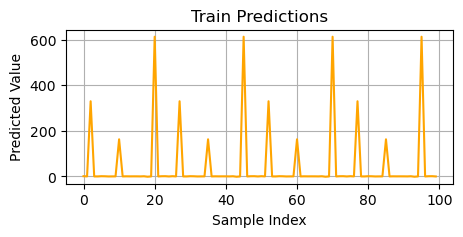

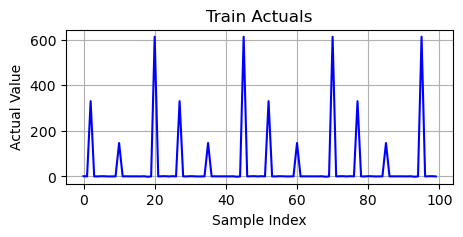

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 2))
plt.plot(train_result['Train Predictions'][:100], color='orange')
plt.title('Train Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.grid(True)
plt.show()

# Plot Actual Values
plt.figure(figsize=(5, 2))
plt.plot(train_result['Actuals'][:100], color='blue')
plt.title('Train Actuals')
plt.xlabel('Sample Index')
plt.ylabel('Actual Value')
plt.grid(True)
plt.show()


In [16]:
val_predictions = model1.predict(X_val).flatten()
val_result = pd.DataFrame(data={'Val Predictions': val_predictions, 'Actuals': y_val.flatten()})
val_result

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Val Predictions,Actuals
0,0.941788,0.930908
1,-0.000008,0.000017
2,329.960938,330.042000
3,-0.028329,0.000000
4,-0.116619,-0.120000
...,...,...
249995,613.454773,613.445000
249996,-0.165561,-0.155900
249997,0.833442,0.832000
249998,0.951016,0.950928


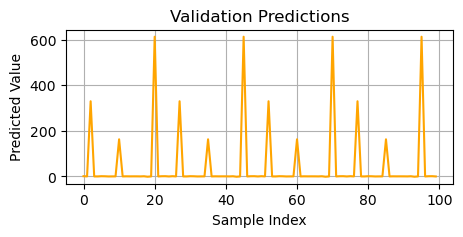

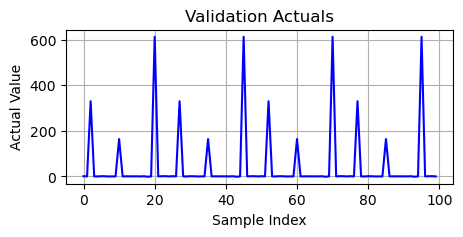

In [17]:
plt.figure(figsize=(5, 2))
plt.plot(val_result['Val Predictions'][:100], color='orange')
plt.title('Validation Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.grid(True)
plt.show()

# Plot Actual Values
plt.figure(figsize=(5, 2))
plt.plot(val_result['Actuals'][:100], color='blue')
plt.title('Validation Actuals')
plt.xlabel('Sample Index')
plt.ylabel('Actual Value')
plt.grid(True)
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
test_pred = model1.predict(X_test)
test_predictions = test_pred.flatten()
test_result = pd.DataFrame(data={'Test Predictions': test_predictions, 'Actuals': y_test.flatten()})
test_result
mse = MeanSquaredError()


loss_value = mse(y_test.flatten(), test_predictions).numpy()
print("MSE:", loss_value)


r2_avg = r2_score(y_test.flatten(), test_pred.flatten(), multioutput='uniform_average')
print("Average R²:", r2_avg)


590/590 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
MSE: 0.8499241
Average R²: 0.9999543291044589


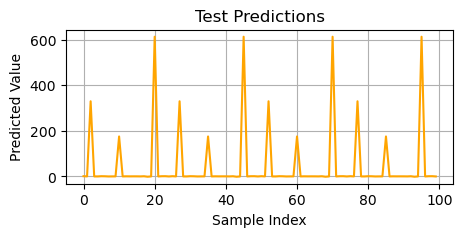

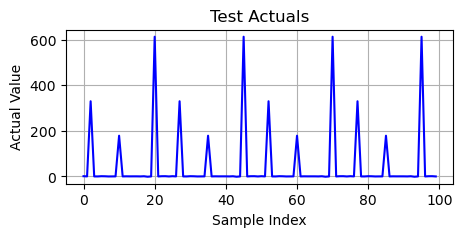

In [19]:
plt.figure(figsize=(5, 2))
plt.plot(test_result['Test Predictions'][:100], color='orange')
plt.title('Test Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.grid(True)
plt.show()

# Plot Actual Values
plt.figure(figsize=(5, 2))
plt.plot(test_result['Actuals'][:100], color='blue')
plt.title('Test Actuals')
plt.xlabel('Sample Index')
plt.ylabel('Actual Value')
plt.grid(True)
plt.show()